# `.ipynb` Notebook for training a `fastai` model

## 0.1 Download necessary datasets

In [17]:
import os
import json

with open("jeff_lam_kaggle.json") as fh:
    jeff_credentials = json.load(fh)

%env KAGGLE_USERNAME=credentials["username"]
%env KAGGLE_KEY=credentials["key"]


from kaggle.api.kaggle_api_extended import KaggleApi
KaggleApi().authenticate()

if not os.path.exists("training_data"):
    os.makedirs("training_data")

datasets = [
    "sagyamthapa/handwritten-math-symbols",
    "xainano/handwrittenmathsymbols"
]

for i in datasets:
    split = i.split("/")
    KaggleApi().dataset_download_files(
        f"{i}", 
        path=f"training_data/{split[1]} ({split[0]})", 
        unzip=True
    )

env: KAGGLE_USERNAME=credentials["username"]
env: KAGGLE_KEY=credentials["key"]
Dataset URL: https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols
Dataset URL: https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols


## 0.2 Merge datasets into one complete grandparent folder
> *I'm not coding this, it's way easier to manually do it.*

## 1. Creating the Model

In [1]:
from fastai.vision.all import *

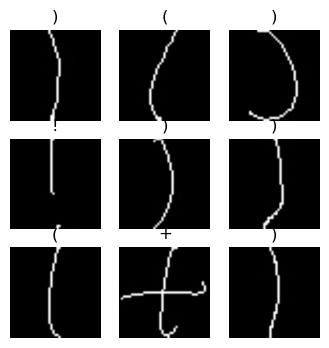

In [2]:
path = Path("training_data/")

dl = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(155)
)

dls = dl.dataloaders(path, bs=512, device=torch.device("cuda"))
dls.show_batch(max_n=9, figsize=(4,4))

In [6]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)

C:\Users\Jeff Lam\anaconda3\Lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_

SuggestedLRs(valley=0.0008317637839354575)

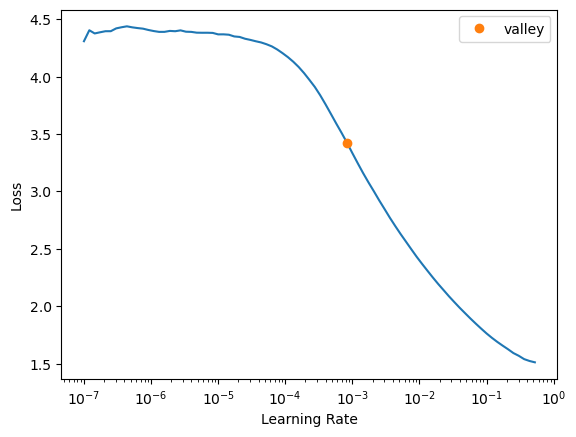

In [7]:
learn.lr_find()

In [10]:
learn.fine_tune(2, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,0.217410,2.141079,0.222799,04:19


epoch,train_loss,valid_loss,error_rate,time
0,0.112103,0.042208,0.008020,04:15
1,0.015971,0.008642,0.001917,04:12


In [12]:
learn.save("model") # saves the WEIGHTS only

Path('models/model.pth')

In [27]:
learn.export("models/model.pkl") # this saves the entire model